In [12]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

attribute_labels = "attribute_labels.json"  #~590Mb
image_links = "image_links.json"            #~12Mb
mvc_info = "mvc_info.json"                  #~140Mb
path = "C:\\Users\\heret\\Desktop\\mvc\\"

df_labels = pd.read_json(attribute_labels)

In [7]:
print(df_labelsabels.head(2))

   AlineDresses  AnimalPrint  Anoraks  Argyle  Asymmetrical  Athletic  \
0             0            0        0       0             0         0   
1             0            0        0       0             0         0   

   BabyDollDresses  BalconetteBras  Bandeau  BandeauBras     ...      Zipper  \
0                0               0        0            0     ...           0   
1                0               0        0            0     ...           0   

   fiftyU              filename  halfZip  hundred1U  hundred2O  hundred2U  \
0       0  p7258521_s3163710_v0        0          0          0          1   
1       0  p7258521_s3163710_v1        0          0          0          1   

       itemN  quarter3Zip  quarterZip  
0  3163710.0            0           0  
1  3163710.0            0           0  

[2 rows x 266 columns]


In [3]:
print(df_labels.shape)
print(df_labels.columns.values)

(161260, 266)
['AlineDresses' 'AnimalPrint' 'Anoraks' 'Argyle' 'Asymmetrical' 'Athletic'
 'BabyDollDresses' 'BalconetteBras' 'Bandeau' 'BandeauBras' 'Banded'
 'Beaded' 'Beige' 'Black' 'Blouses' 'Blue' 'BoardShorts' 'Boatneck'
 'BomberJackets' 'BootCut' 'BoxerBriefs' 'Boxers' 'BoyShorts'
 'BoyfriendFit' 'BraletteBras' 'Bras' 'Brief' 'Brocade' 'Bronze' 'Brown'
 'Burgundy' 'BustierDresses' 'ButtonUpShirts' 'Buttondown' 'Buttons'
 'Camis' 'Camisoles' 'Camo' 'Capes' 'CapriPants' 'Cardigans' 'CargoPants'
 'Cashmere' 'Chains' 'Chambray' 'Checkered' 'CheetahPrint' 'Chenille'
 'Chevron' 'Chiffon' 'Chino' 'CoatDresses' 'Coated' 'Compression'
 'CompressionBras' 'CompressionPants' 'ContrastStitching'
 'ConvertibleBras' 'ConvertiblePants' 'Coral' 'Corset' 'Cotton'
 'CoverUpDresses' 'CoverUps' 'Coveralls' 'Cowl' 'Crew' 'Crochet' 'Cropped'
 'CroppedJackets' 'Crossback' 'Crosstraining' 'Crystals' 'DemiBras'
 'Denim' 'DolmanSleeve' 'Embossed' 'Embroidered' 'EmpireDresses'
 'EnhancedBras' 'FieldJacket' 

### Deepfashion top frequency categories:
Dress, TShirt, Blouse, Shorts, Tank, Skirt, Cardigan, Sweater, Jacket, Top, Blazer, Romper, Jeans, Jumpsuit, Leggings, Joggers
### Zara Website categories:
**Male**:  
CAZADORAS, ABRIGOS, BLAZERS, TRAJES, PANTALONES, BERMUDAS, JEANS, CAMISAS, CAMISETAS, POLOS, SUDADERAS, PUNTO, ZAPATOS,
BOLSOS, ACCESORIOS, BAÑADORES

**Female**:  
ABRIGOS, CHAQUETAS, BLAZERS, VESTIDOS, MONOS, CAMISAS Y BLUSAS, TOPS, CAMISETAS, PUNTO, BODY, PANTALONES, JEANS, SHORTS, FALDAS, TOTAL LOOK, TRAJES, BAÑO, ZAPATOS, BOLSOS, ACCESORIOS
### H&M:
**Male**
Chaquetas y abrigos, Sudaderas con y sin capucha, Cárdigans y jerséis, Camisetas de manga corta y sin mangas, Calzado, Camisas, Basics, Americanas y trajes,, Pantalones cortos, Pantalones y chinos, Vaqueros, Moda de baño, Ropa interior, Calcetines, Accesorios, Sport, Tallas amplias  

**Female**
Basics, Camisas y Blusas, Cárdigans y Jerséis, Prendas de punto, Americanas y Chalecos, Chaquetas y Abrigos, Pantalones, Vaqueros, Pantalones cortos, Faldas, Vestidos, Monos, Calzado, Accesorios, Moda de baño, Lencería, Ropa para dormir, Calcetines y Medias, Ropa de deporte, Ropa de premamá, Tallas grandes, Múltiples tallas, Beauty, 
Sudaderas con y sin capucha

In [4]:
#dropping duplicate photos
df_labels.drop_duplicates(subset="itemN", keep="first", inplace=True)
print(df_labels.shape)

(37499, 266)


In [5]:
categories = [
    "AlineDresses", "Anoraks", "BabyDollDresses", "BalconetteBras", "Bandeau", "BandeauBras", "Blouses",
    "BoardShorts", "BomberJackets", "BoxerBriefs", "Boxers", "BoyShorts", "BraletteBras", "Bras", "Brief",
    "BustierDresses", "ButtonUpShirts", "Buttondown", "Buttons", "Camis", "Camisoles",
    "Capes", "CapriPants", "Cardigans", "CargoPants", "Chino", "CoatDresses", "CompressionBras",
    "CompressionPants", "ConvertibleBras", "ConvertiblePants",
    "Corset", "CoverUpDresses", "CoverUps", "Coveralls", "CroppedJackets", "DemiBras", "EmpireDresses",
    "EnhancedBras", "FieldJacket", "FlatFrontPants", "FleeceJackets", "HalterDresses", "HighLowDresses",
    "HighWaistDresses", "InsulatedJackets", "Leggings", "Lingerie", "LittleBlackDress", "LoungePants",
    "MinimizerBras", "MoldedCupBras", "NursingBras", "OnePieceSwimsuits", "OneShoulderDresses", "Overalls",
    "PaddedBras", "PajamaBottoms", "PajamaSets", "PajamaTops", "Panties", "Parkas", "PeaCoats", "PitZips",
    "PleatedFrontPants", "PlungeBras", "Polos", "Pullover", "PushUpBras", "Racerback", "RainCoats", "RainPants",
    "SheathDresses", "ShelfBras", "ShiftDresses", "ShirtDresses", "Skirts", "SnowPants", "SoftCupBras",
    "SportDresses", "SportsBras", "StraplessBras", "StraplessDresses", "SweaterDresses", "Sweatpants", 
    "SwimDresses", "SwimSets", "SwimsuitBottoms", "SwimsuitTops", "TShirts", "TankDresses", "TankTops",
    "Tanktops", "Thongs", "TrackJackets", "TrackPants", "TrenchCoats", "Trousers", "TunicDresses", "UnderwireBras",
    "Vests", "WaterproofJackets", "WorkoutPants", "WrapDresses"
             ]
print(len(categories))

104


In [6]:
first_row = df_labels.drop(columns=["filename", "itemN"]).head(1).transpose()
first_row[first_row[0] == 1] #not all observations seem to have a category

,0
Fleece,1
Gray,1
LongSleeves,1
Polyester,1
WindResistant,1
Windproof,1
hundred2U,1


In [10]:
print(df_labels[categories].sum(axis=1).value_counts())
# 4890 photos do not fit any category

1     18680
2     12098
0      4890
3      1341
4       358
5       111
6        15
19        3
12        2
9         1
dtype: int64


In [48]:
print(df_labels[categories].sum().sum()) #not mutually exclusive

49066


In [36]:
index_no_categories = df_labels[df_labels[categories].sum(axis=1) == 0].index.tolist()

In [43]:
df_no_categories = df_labels.drop(columns=categories).drop(columns=["filename", "itemN"]).loc[index_no_categories].transpose()

In [61]:
n = 0
for column in df_no_categories.columns:
    if n == 20: 
        break
    print("column: ", column)
    print(df_no_categories[column][df_no_categories[column] == 1])
    n += 1
#first examples??? is this the same product in different colour???? styleId vs productId??

column:  0
Fleece           1
Gray             1
LongSleeves      1
Polyester        1
WindResistant    1
Windproof        1
hundred2U        1
Name: 0, dtype: int64
column:  5
Brown            1
Fleece           1
LongSleeves      1
Polyester        1
WindResistant    1
Windproof        1
hundred2U        1
Name: 5, dtype: int64
column:  10
Blue             1
Fleece           1
LongSleeves      1
Polyester        1
WindResistant    1
Windproof        1
hundred2U        1
Name: 10, dtype: int64
column:  15
Fleece           1
Gray             1
LongSleeves      1
Polyester        1
WindResistant    1
Windproof        1
hundred2U        1
Name: 15, dtype: int64
column:  20
Black            1
Fleece           1
LongSleeves      1
Polyester        1
WindResistant    1
Windproof        1
hundred2U        1
Name: 20, dtype: int64
column:  25
Fleece           1
LongSleeves      1
Polyester        1
White            1
WindResistant    1
Windproof        1
hundred2U        1
Name: 25, dtype: in

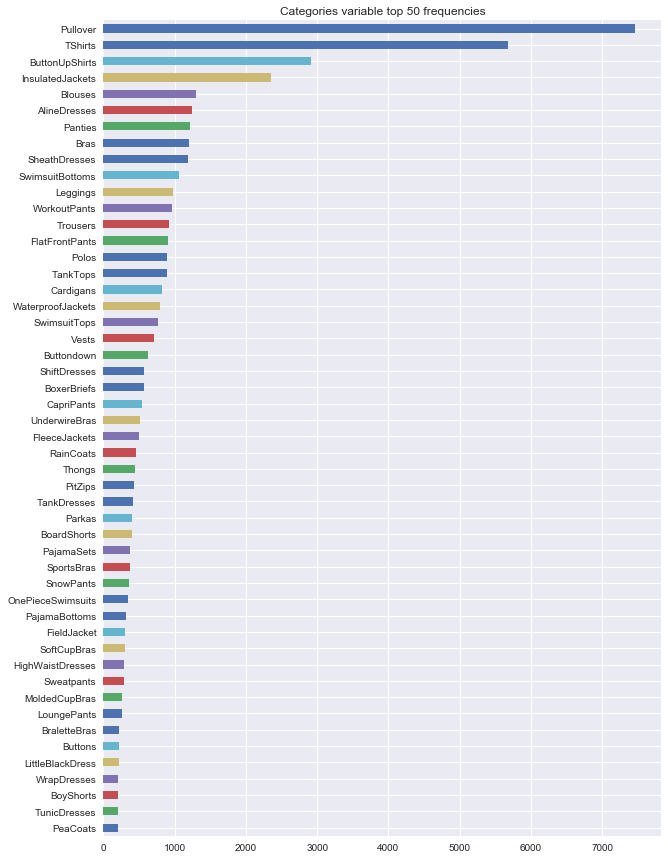

In [11]:
df_labels[categories].sum(axis=0).sort_values(ascending=True).tail(50).plot(
                                    figsize=(10,15),
                                       kind="barh",
                                       title="Categories variable top 50 frequencies"
                                       )
plt.show()

### Info file

Number of unique 'category':  10
Number of unique 'subCategory1':  10
Number of unique 'subCategory2':  23


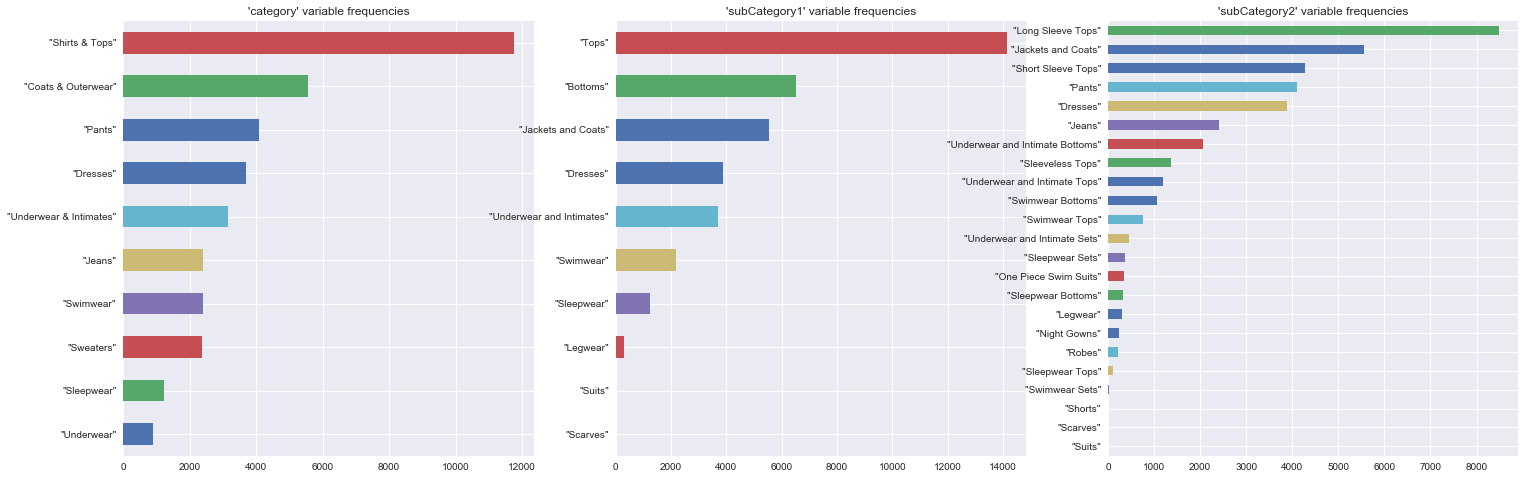

In [9]:
df_mvc = pd.read_json(mvc_info)
print("Number of unique 'category': ", len(df_mvc["category"].unique()))
print("Number of unique 'subCategory1': ", len(df_mvc["subCategory1"].unique()))
print("Number of unique 'subCategory2': ", len(df_mvc["subCategory2"].unique()))

# Duplicate photos removed based on unique styleId labels

f = plt.figure(figsize=(25,8))
axes = f.subplots(nrows=1, ncols=3, squeeze=False)

df_mvc[["styleId", "category"]].drop_duplicates()["category"].value_counts().sort_values().plot(ax=axes[0,0],
                                                     kind="barh",
                                                     title="'category' variable frequencies"
                                                   )
df_mvc[["styleId", "subCategory1"]].drop_duplicates()["subCategory1"].value_counts().sort_values().plot(ax=axes[0,1],
                                                         kind="barh",
                                                         title="'subCategory1' variable frequencies"
                                                        )
df_mvc[["styleId", "subCategory2"]].drop_duplicates()["subCategory2"].value_counts().sort_values().plot(ax=axes[0,2],
                                                         kind="barh",
                                                         title="'subCategory2' variable frequencies"
                                                        )
plt.show()

#### Upper body categories?
- "subCategory2" - "Long Sleeve Tops"
- "subCategory2" - "Jackets and Coats"
- "subCategory2" - "Short Sleeve Tops"
- "subCategory2" - "Dresses"
- "subCategory2" - "Sleeveless Tops"

----------

- "category" - "Sweaters"
- "df_labels" - "Pullover"
- "df_labels" - "ButtomUpShirts"
- "df_labels" - "TShirts"
- "df_labels" - "InsulatedJackets"
- "df_labels" - "Blouses"